# Replicate API

First we need to identify ourselves with the key that we get from Replicate. When working from a script, setting an environment variable as following should be sufficient:

In [1]:
import os
# Set the environment variable
os.environ["REPLICATE_API_TOKEN"] = "xxxxxxxxxxxxxxxxxxxxxx"

Here we need to use the key when we create the "client" that sends the information to Replicate:

In [1]:
import replicate
from replicate.client import Client

In [2]:
myreplicate = Client(api_token='xxxxxxxxxxxxxxxxxxxxxx')

Finally we can call a model with options. Computing is done **remotely**!

In [3]:
output = myreplicate.run(
    "stability-ai/stable-diffusion-3.5-large",
    input={
        "cfg": 4.5,
        "steps": 40,
        "prompt": "~*~aesthetic~*~ #boho #fashion, cat with a red hat",
        "aspect_ratio": "1:1",
        "output_format": "webp",
        "output_quality": 90,
        "prompt_strength": 0.85
    }
)
print(output)

Finally we can display the result, here a webp format:

In [4]:
from IPython.display import HTML
HTML(f'<img src="{output[0].url}" width="300"/>')  # Adjust width as desired

## Inpainting

The inpainting model we used previously form HuggingFace is also available on Replicate. So, if we are ok to pay for computing resources, we can spare ourselves the installation/download process on Colab and directly create images by calling [the correct API](https://replicate.com/stability-ai/stable-diffusion-inpainting?input=python&action=switch-account):

In [18]:
image_uri = open('data/woody_baille.JPG', 'rb')
mask_uri = open('data/woody_mask.png', 'rb')

In [8]:
output = myreplicate.run(
    "stability-ai/stable-diffusion-inpainting:95b7223104132402a9ae91cc677285bc5eb997834bd2349fa486f53910fd68b3",
    input={
        "mask": mask_uri,
        "image": image_uri,
        "width": 512,
        "height": 512,
        "prompt": "A colorful bird, high-res realistic",
        "scheduler": "DPMSolverMultistep",
        "num_outputs": 1,
        "guidance_scale": 7.5,
        "num_inference_steps": 25,
        "output_format": "png",
    }
)
print(output)

In [13]:
import skimage
import matplotlib.pyplot as plt

gen_im = skimage.io.imread(output[0].url)

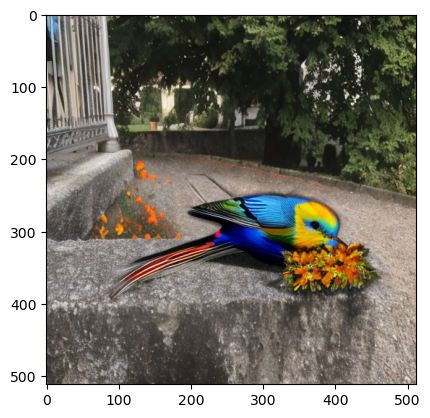

In [16]:
plt.imshow(gen_im);